In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Train.csv")
testdf = pd.read_csv("./Test.csv")


In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: ylabel='count'>

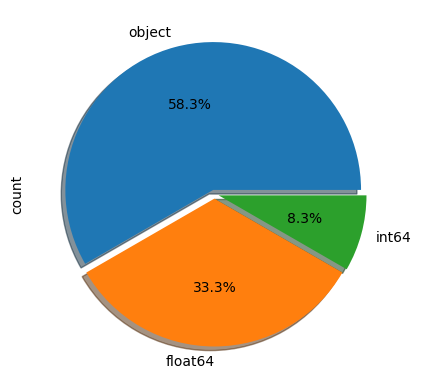

In [5]:
df.dtypes.value_counts().plot.pie(autopct = "%1.1f%%",explode = [0.03,0.03,0.03],shadow = True)

In [6]:
df.dtypes == "object"

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales            False
dtype: bool

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# we dont need item identifier and outlet identifier so delete it
df.drop(["Item_Identifier","Outlet_Identifier"],axis = 1 , inplace =True)
testdf.drop(["Item_Identifier","Outlet_Identifier"],axis = 1 , inplace =True)

In [9]:
df["Item_Fat_Content"].unique() # there are two varible in this column low fat and regular rest of 3 are the same. need to correct
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("reg","Regular")
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("LF","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("low fat","Low Fat")

In [10]:
testdf["Item_Fat_Content"].unique() # there are two varible in this column low fat and regular rest of 3 are the same. need to correct
testdf["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("reg","Regular")
testdf["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("LF","Low Fat")
testdf["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("low fat","Low Fat")

In [11]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [12]:
df2 = df.copy()
df.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
# now we have 10 columns and 5 of them contains catagorical value
encoded_rout = {}
internal_rout = {}
from sklearn.preprocessing import LabelEncoder
lst = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for i in lst:
    en = LabelEncoder()
    df[i] = en.fit_transform(df[i])
    testdf[i] = df[i]
    for k in df2[i].index:
        internal_rout[df2.loc[k,i]] =  df.loc[k,i]
    encoded_rout[i]= internal_rout
    internal_rout = {}

In [14]:
encoded_rout

{'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
 'Item_Type': {'Dairy': 4,
  'Soft Drinks': 14,
  'Meat': 10,
  'Fruits and Vegetables': 6,
  'Household': 9,
  'Baking Goods': 0,
  'Snack Foods': 13,
  'Frozen Foods': 5,
  'Breakfast': 2,
  'Health and Hygiene': 8,
  'Hard Drinks': 7,
  'Canned': 3,
  'Breads': 1,
  'Starchy Foods': 15,
  'Others': 11,
  'Seafood': 12},
 'Outlet_Size': {'Medium': 1, nan: 3, 'High': 0, 'Small': 2},
 'Outlet_Location_Type': {'Tier 1': 0, 'Tier 3': 2, 'Tier 2': 1},
 'Outlet_Type': {'Supermarket Type1': 1,
  'Supermarket Type2': 2,
  'Grocery Store': 0,
  'Supermarket Type3': 3}}

In [15]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


# data cleaning completed
# Data Visulization

In [16]:
df2.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,Tier 2,Supermarket Type1,4710.5350


<Axes: ylabel='count'>

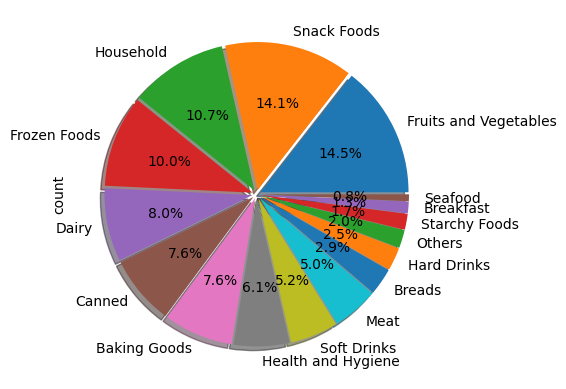

In [17]:
# item type overal
df2["Item_Type"].value_counts().plot.pie(shadow = True,explode = np.full((df2.Item_Type.unique().size),fill_value = 0.03),autopct = "%1.1f%%")

<Axes: xlabel='count', ylabel='Item_Type'>

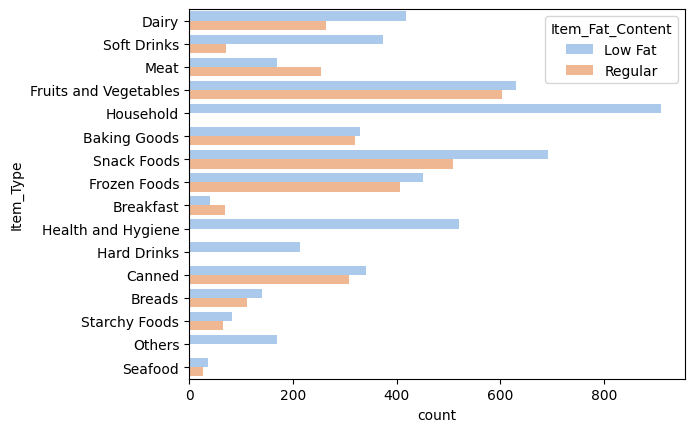

In [18]:
sns.countplot(data = df2,y = "Item_Type",palette = sns.color_palette("pastel"),hue = "Item_Fat_Content")

<Axes: ylabel='count'>

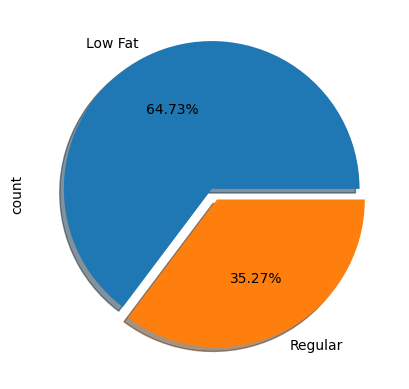

In [19]:
df2.Item_Fat_Content.value_counts().plot.pie(explode = [0.04,0.04],shadow = True,autopct = "%1.2f%%")
# so 64.7% food has low fat 

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

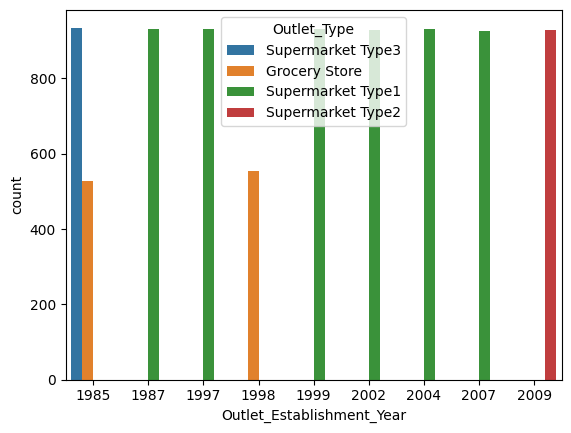

In [20]:
# establishment by year
sns.countplot(data = df2,x= "Outlet_Establishment_Year",hue = "Outlet_Type" )

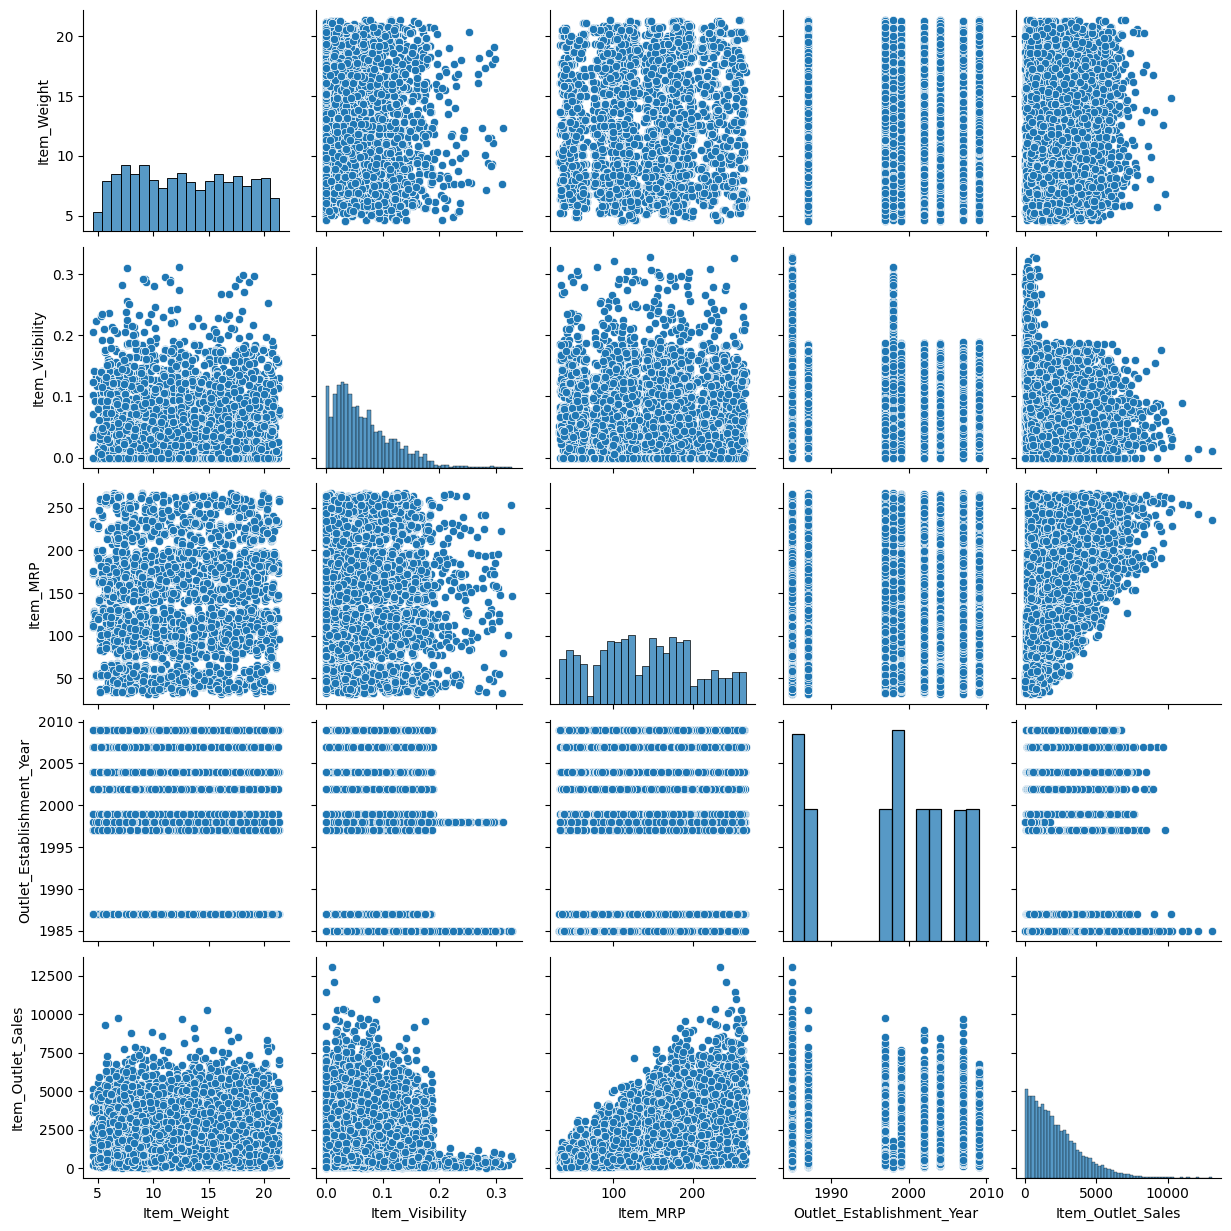

In [21]:
sns.pairplot(data = df2)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

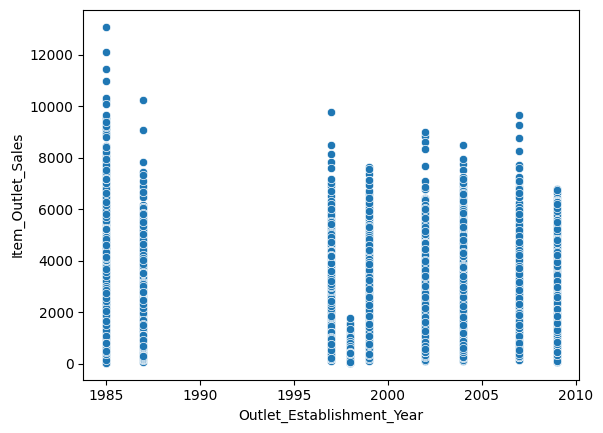

In [22]:
sns.scatterplot(data = df,x="Outlet_Establishment_Year",y="Item_Outlet_Sales")

In [23]:
#highest and lowest mrp
print(f"highest = {df.Item_MRP.max()}\nlowest mrp = {df.Item_MRP.min()}")

highest = 266.8884
lowest mrp = 31.29


In [24]:
# highest and lowest mrp by item type
print("max\n",df2.groupby("Item_Type")["Item_MRP"].max())
print("min\n",df2.groupby("Item_Type")["Item_MRP"].min())


max
 Item_Type
Baking Goods             265.5568
Breads                   263.6594
Breakfast                234.9300
Canned                   266.8884
Dairy                    266.6884
Frozen Foods             264.8910
Fruits and Vegetables    264.2252
Hard Drinks              261.4278
Health and Hygiene       266.6884
Household                264.7910
Meat                     261.5936
Others                   254.9040
Seafood                  240.2880
Snack Foods              264.9568
Soft Drinks              263.5910
Starchy Foods            263.0252
Name: Item_MRP, dtype: float64
min
 Item_Type
Baking Goods             33.9874
Breads                   31.9558
Breakfast                40.0480
Canned                   36.3506
Dairy                    33.4874
Frozen Foods             31.9558
Fruits and Vegetables    36.2506
Hard Drinks              34.2532
Health and Hygiene       33.1216
Household                32.4558
Meat                     34.7532
Others                   35.0190

<Axes: xlabel='Item_Type'>

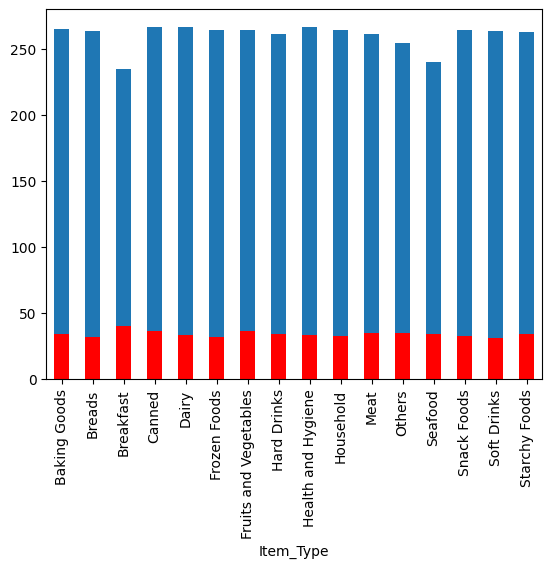

In [25]:
df2.groupby("Item_Type")["Item_MRP"].max().plot.bar()
df2.groupby("Item_Type")["Item_MRP"].min().plot.bar(color="red")

In [26]:
# average highest mrp and lowest mrp and average mrp
print("average of highest price",df2.groupby("Item_Type")["Item_MRP"].max().mean())
print("average of lowest price",df2.groupby("Item_Type")["Item_MRP"].min().mean())
print("average of  price",df2.groupby("Item_Type")["Item_MRP"].mean())
print("average of difference in price",((df2.groupby("Item_Type")["Item_MRP"].max()-df2.groupby("Item_Type")["Item_MRP"].min()).mean()))

average of highest price 260.5065625
average of lowest price 34.0661875
average of  price Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64
average of difference in price 226.440375


In [27]:
#item sales by establishment year
print("average outlet sales per year",df2.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean())
min = df2.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].min()
max =df2.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].max()
print("\nhighest and lowest outelet sales per year")
for i in max.index:
    print(i,"=>",max[i],"-",min[i])

average outlet sales per year Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

highest and lowest outelet sales per year
1985 => 13086.9648 - 33.9558
1987 => 10256.649 - 73.238
1997 => 9779.9362 - 101.8674
1998 => 1775.6886 - 33.29
1999 => 7646.0472 - 111.8544
2002 => 8994.958 - 99.87
2004 => 8479.6288 - 113.8518
2007 => 9664.7528 - 143.8128
2009 => 6768.5228 - 69.2432


<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

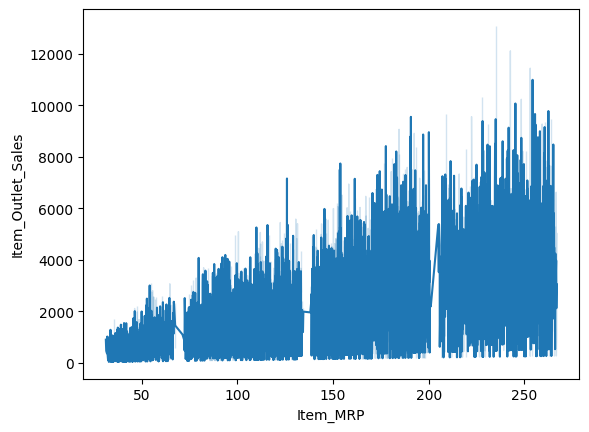

In [28]:
sns.lineplot(data=df,y="Item_Outlet_Sales",x="Item_MRP")

<Axes: xlabel='count', ylabel='Outlet_Type'>

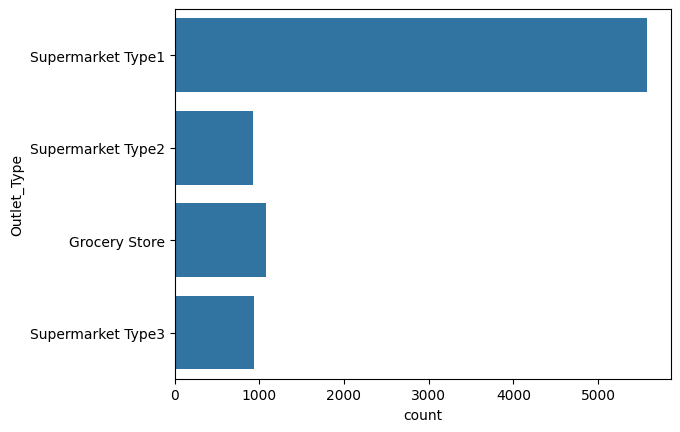

In [29]:
sns.countplot(data = df2 , y  = "Outlet_Type")

In [30]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.023238,-0.014048,0.030765,0.027141,-0.011588,-0.015656,0.004715,-0.001088,0.014123
Item_Fat_Content,-0.023238,1.000000,0.047314,-0.139434,0.006063,0.003151,-0.001365,-0.001598,0.002199,0.018719
Item_Visibility,-0.014048,0.047314,1.000000,-0.035249,-0.001315,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,0.030765,-0.139434,-0.035249,1.000000,0.032651,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.027141,0.006063,-0.001315,0.032651,1.000000,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.011588,0.003151,-0.074834,0.004970,0.005020,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.015656,-0.001365,0.087796,0.000827,-0.002473,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.004715,-0.001598,-0.028099,0.003084,0.000232,-0.089216,-0.290216,1.000000,0.467219,0.089367
Outlet_Type,-0.001088,0.002199,-0.173468,0.003053,-0.001975,-0.122304,-0.432062,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.014123,0.018719,-0.128625,0.017048,0.567574,-0.049135,-0.172477,0.089367,0.401522,1.000000


In [31]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.736360,1.112871,1.201220,2181.288914
std,4.643456,0.477836,0.051598,4.209990,62.275067,8.371760,0.989181,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,8.773750,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.600000,0.000000,0.053931,6.000000,143.012800,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,16.850000,1.000000,0.094585,10.000000,185.643700,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,3.000000,2.000000,3.000000,13086.964800


In [32]:
## item type and outlet sales 
mx= df2.groupby("Item_Type")["Item_Outlet_Sales"].max()
mn = df2.groupby("Item_Type")["Item_Outlet_Sales"].min()

print(f"{'Items':<25}   {'maximum':<10}   minimum\n")

for i in mx.index:
    print(f"{i:<25}=> {mx[i]:<10} - {mn[i]}")

Items                       maximum      minimum

Baking Goods             => 7931.6754  - 37.2848
Breads                   => 8958.339   - 35.2874
Breakfast                => 8209.314   - 39.948
Canned                   => 10306.584  - 37.9506
Dairy                    => 10256.649  - 40.6138
Frozen Foods             => 9678.0688  - 36.619
Fruits and Vegetables    => 12117.56   - 45.2744
Hard Drinks              => 7843.124   - 37.9506
Health and Hygiene       => 9779.9362  - 34.6216
Household                => 13086.9648 - 33.29
Meat                     => 9390.4432  - 47.9376
Others                   => 6008.845   - 39.948
Seafood                  => 6503.5344  - 149.805
Snack Foods              => 10993.6896 - 33.9558
Soft Drinks              => 9554.23    - 33.29
Starchy Foods            => 8132.0812  - 58.5904


In [33]:
mean_wt = df.Item_Weight.mean()
df.Item_Weight.fillna(mean_wt,inplace = True)

# ml algorithms

In [34]:
testx , testy = df.iloc[:,:-1],df.iloc[:,-1]

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [36]:
#feature selection 
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
# linear
linearModel = LinearRegression()
linearModel.fit(x,y)
linearModel.score(testx,testy)

0.499938016095958

In [38]:
# polynomial 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
px = poly.fit_transform(x)
plmodel = LinearRegression()
plmodel.fit(px,y)
plmodel.score(poly.fit_transform(testx),testy)

0.63912649929785

In [39]:
# svr
svr = LinearSVR()
svr.fit(x,y)
svr.score(testx,testy)

-0.6287685502215334

In [40]:
#kn regressor
knr = KNeighborsRegressor(n_neighbors = 2,weights = "uniform")
knr.fit(x,y)
knr.score(testx,testy)

0.7782494493730654

In [41]:
#dtr
dtr = DecisionTreeRegressor(splitter = "random",max_depth=20)
dtr.fit(x,y)
dtr.score(testx,testy)

0.9860872365415434

In [42]:
## ensemble learning is used to make weak / base learner to a strong learner

In [43]:
# random forest r
rfr = RandomForestRegressor()
rfr.fit(x,y)
rfr.score(testx,testy)

0.9375679448181654

In [44]:
#ada boost
abr = AdaBoostRegressor(estimator = svr)
abr.fit(x,y)
abr.score(testx,testy)

0.16122094517662877

In [45]:
#gradient boost
gbr = GradientBoostingRegressor()
gbr.fit(x,y)
gbr.score(testx,testy)

0.6290997151755835

In [46]:
# so from above immplementation we found that decision tree has more score than others
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [47]:
print("the score of the decision tree regressor is ",dtr.score(testx,testy))
print("r2 score of the decision tree regressor is ",r2_score(testy,dtr.predict(testx)))
print("mean squared error of the decision tree regressor is ",mean_squared_error(testy,dtr.predict(testx)))
print("mean absolute error of the decision tree regressor is ",mean_absolute_error(testy,dtr.predict(testx)))

the score of the decision tree regressor is  0.9860872365415434
r2 score of the decision tree regressor is  0.9860872365415434
mean squared error of the decision tree regressor is  40511.17431826401
mean absolute error of the decision tree regressor is  49.28269332440005


In [48]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [49]:
encoded_rout

{'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
 'Item_Type': {'Dairy': 4,
  'Soft Drinks': 14,
  'Meat': 10,
  'Fruits and Vegetables': 6,
  'Household': 9,
  'Baking Goods': 0,
  'Snack Foods': 13,
  'Frozen Foods': 5,
  'Breakfast': 2,
  'Health and Hygiene': 8,
  'Hard Drinks': 7,
  'Canned': 3,
  'Breads': 1,
  'Starchy Foods': 15,
  'Others': 11,
  'Seafood': 12},
 'Outlet_Size': {'Medium': 1, nan: 3, 'High': 0, 'Small': 2},
 'Outlet_Location_Type': {'Tier 1': 0, 'Tier 3': 2, 'Tier 2': 1},
 'Outlet_Type': {'Supermarket Type1': 1,
  'Supermarket Type2': 2,
  'Grocery Store': 0,
  'Supermarket Type3': 3}}

In [50]:
dtr.predict([[56,1,1223,4,203.334,2004,1,1,3]])

array([5303.097])